In [1]:
# 聚类分析作业

# 导入模块及数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
from sklearn.preprocessing import StandardScaler # 标准化函数
from sklearn.cluster import AgglomerativeClustering # 层次聚类算法
from sklearn.cluster import KMeans # K均值聚类算法
from sklearn.cluster import DBSCAN # 密度聚类算法
from sklearn.metrics import silhouette_score # 轮廓系数

df = pd.read_csv("statex77.csv",header=0) 
print(df.info())

# 数据标准化
Features = df.columns[1:]
std_scale = StandardScaler()
for feature in Features:
    df[feature] = std_scale.fit_transform(df[feature].values.reshape(-1,1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       50 non-null     object 
 1   Population  50 non-null     int64  
 2   Income      50 non-null     int64  
 3   Illiteracy  50 non-null     float64
 4   Life Exp    50 non-null     float64
 5   Murder      50 non-null     float64
 6   HS Grad     50 non-null     float64
 7   Frost       50 non-null     int64  
 8   Area        50 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.6+ KB
None


数据说明：
数据集：statex77.csv（关于美国50个州的部分指标信息）共50条数据，9个变量
变量：
    State：州名
    Population: 人口数
    Income: 人均收入
    Illiteracy: 文盲率
    Life Exp: 人均预期寿命
    Murder: 谋杀率
    HS Grad: 高中毕业率
    Frost: 霜冻期
    Area: 地域面积

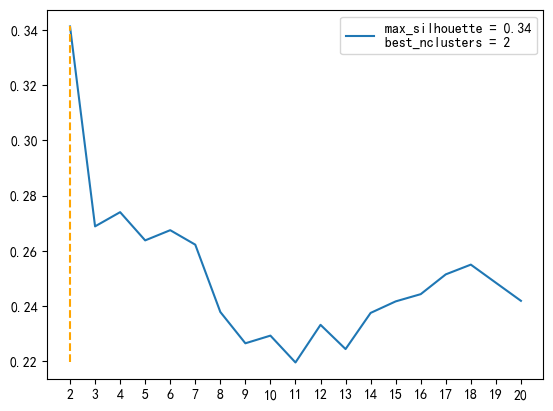

<function dict.items>

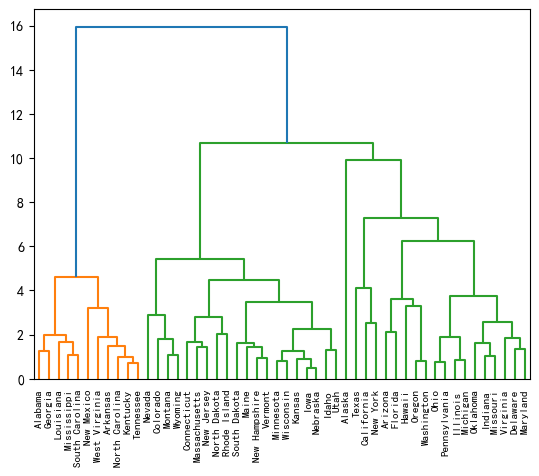

In [2]:
# 层次聚类（系统聚类）
data = df.iloc[:,1:].values
Nclusters = np.arange(2,21,1)
Silhouette = np.array([])
for i in Nclusters:
    Agg = AgglomerativeClustering(n_clusters=i,linkage='ward').fit(data)
    Silhouette = np.append(Silhouette, silhouette_score(data, Agg.labels_, metric='euclidean'))

# 轮廓系数变化图，可知聚类数为2时层次聚类表现最佳
max_index = np.argmax(Silhouette)
best_threshold = Nclusters[max_index]
plt.plot(Nclusters, Silhouette,label = "max_silhouette = 0.34"+"\n"+"best_nclusters = 2")
plt.xticks(Nclusters,labels=Nclusters)
plt.vlines(2, ymin = np.min(Silhouette), ymax = np.max(Silhouette), linestyle='--', color = "orange")
plt.legend()
plt.show()

# 层次聚类树
from scipy.cluster.hierarchy import linkage,dendrogram
linkage_array = linkage(data, method="ward")
cluster_tree = dendrogram(linkage_array,labels=df["State"].values)
cluster_tree.items

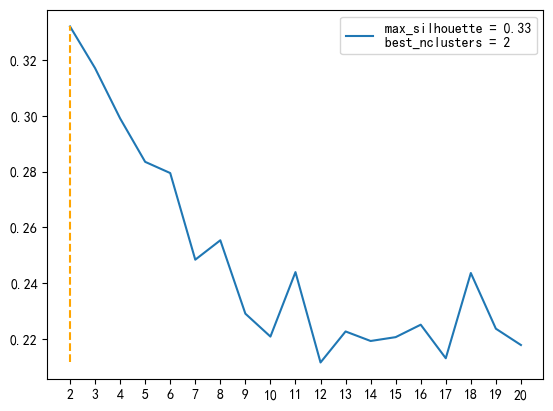

160.67099396440372


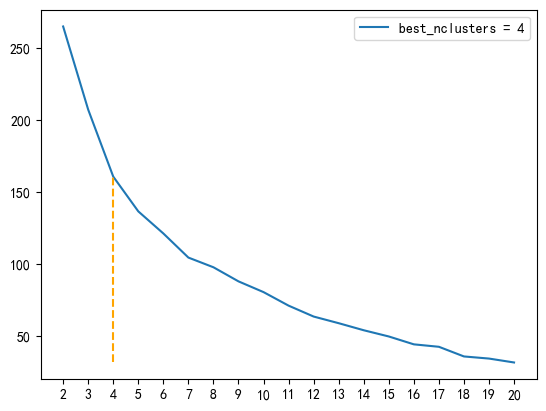

In [6]:
# K-means 聚类
data = df.iloc[:,1:].values
Nclusters = np.arange(2,21,1)
Silhouette = np.array([])
Inertia = np.array([])
for i in Nclusters:
    Km = KMeans(n_clusters=i).fit(data)
    Silhouette = np.append(Silhouette, silhouette_score(data, Km.labels_, metric='euclidean'))
    Inertia = np.append(Inertia,Km.inertia_)

# 轮廓系数变化图，可知聚类数为2时Kmeans聚类表现最佳
max_index = np.argmax(Silhouette)
best_threshold = Nclusters[max_index]
plt.plot(Nclusters, Silhouette,label = "max_silhouette = 0.33"+"\n"+"best_nclusters = 2")
plt.xticks(Nclusters,labels=Nclusters)
plt.vlines(2, ymin = np.min(Silhouette), ymax = np.max(Silhouette), linestyle='--', color = "orange")
plt.legend()
plt.show()

# 类内总距离和变化图，由手肘法估计聚类数为4时Kmeans聚类表现最佳
plt.plot(Nclusters, Inertia,label = "best_nclusters = 4")
plt.xticks(Nclusters,labels=Nclusters)
plt.vlines(4, ymin = np.min(Inertia), ymax = Inertia[2], linestyle='--', color = "orange")
plt.legend()
plt.show()

In [4]:
# DBSCAN聚类（密度聚类）
data = df.iloc[:,1:].values
DB = DBSCAN().fit(data)
print(DB.labels_)

"""
密度聚类法将50个州聚成一类
"""

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


'\n密度聚类法将50个州聚成一类\n'